In [2]:
import numpy as np 
import pandas as pd 
import os
from keras import backend as K
import seaborn as sns 
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.svm import SVC
from sklearn import metrics, naive_bayes
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from sklearn.model_selection import LeaveOneOut
from keras.utils import np_utils
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import random
import warnings
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import keras
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## 导入数据

In [3]:
pheno = pd.read_csv('tcga.gpheno.csv',index_col=[0])
pheno.head()

,name,progression,source,dose,label
1,./data/gdc/cbb56e08-41dd-4c10-90ee-910e7b54ab5...,LUSC,TCGA,3,1
2,./data/gdc/d0d1b05c-8518-4ab4-90d5-159a671847c...,LUSC,TCGA,3,1
3,./data/gdc/98e3175d-db07-4967-bc2f-c80894abeca...,LUSC,TCGA,3,1
4,./data/gdc/574abc9e-aeb3-4e64-bc64-d21d619401f...,LUSC,TCGA,3,1
5,./data/gdc/0e18c31d-a77d-41d6-933c-fc3df610a81...,LUSC,TCGA,3,1


In [4]:
data = pd.read_csv('exprSet_TCGA100.csv',index_col=[0])
data = data.T
data.head()

,UBE2C,CENPA,TPX2,CDC20,KIF4A,HJURP,KIF2C,PLK1,MYBL2,BIRC5,...,TK1,SPC25,SPC24,E2F7,CDKN3,RGCC,IQGAP3,CDC25A,NOSTRIN,XRCC2
..data.gdc.cbb56e08.41dd.4c10.90ee.910e7b54ab51.5a7f277a.28b9.403b.959b.51e4b024084b.htseq.counts,6.979994,4.248401,7.622977,6.634700,5.530808,5.359669,6.219619,6.259319,7.962267,7.897401,...,6.913494,4.467030,5.080876,4.876114,3.629659,5.000663,5.832014,3.839421,1.720955,4.353725
..data.gdc.d0d1b05c.8518.4ab4.90d5.159a671847c5.94b65d9b.b3d9.45b2.80ac.cb4664fe8428.htseq.counts,6.543213,4.264844,6.996129,6.699813,5.354023,4.419221,5.323058,6.355777,7.575526,6.777294,...,7.647332,3.793738,4.604451,3.609271,4.695916,3.561431,5.142703,4.315540,0.758491,4.148970
..data.gdc.98e3175d.db07.4967.bc2f.c80894abecab.9ef0c6dd.6e38.41fd.aff6.ae0800c7755d.htseq.counts,5.252205,3.932000,7.272806,5.994358,5.441765,4.188509,4.974727,5.431029,6.056109,6.366968,...,6.645368,2.857964,4.150319,4.412879,4.583595,4.944197,4.713299,3.437807,1.475544,3.903920
..data.gdc.574abc9e.aeb3.4e64.bc64.d21d619401fe.00068002.f4f0.4610.bfe6.67169c760d21.htseq.counts,6.960750,4.796605,8.040177,6.511094,6.015650,5.600718,5.289741,7.105901,7.314592,7.112965,...,7.589261,3.939218,4.447551,5.273020,5.222750,2.272494,5.056833,4.175735,0.720794,4.669810
..data.gdc.0e18c31d.a77d.41d6.933c.fc3df610a818.01444ada.b1f7.4f08.addd.85f02d177ffd.htseq.counts,5.556585,4.150574,7.684603,7.364100,5.702959,5.370147,6.353751,6.693683,6.372051,7.353430,...,7.571670,4.128715,4.778606,5.223169,4.808913,3.836759,6.100661,4.723986,1.243191,4.503911


## 模型建立

In [5]:
X = data
y = pheno['label']

In [6]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

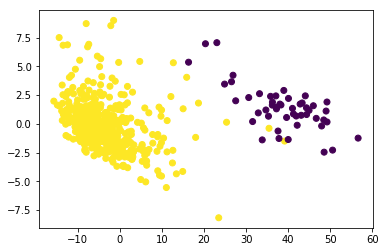

In [7]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y)
plt.show()

### Navie Bayes

In [71]:
skf = StratifiedKFold(n_splits=10,random_state=5,shuffle=True)
clf = naive_bayes.GaussianNB()
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
A = []
for train, test in skf.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

The accuracy on trainging set is: 0.987295935108861 The accuracy on test set is: 0.98730278980279
The Sensitivity is: 0.9881176470588237 The Specificity is 0.975
auc is: 0.9815588235294118


### logistic regression

In [27]:
skf = StratifiedKFold(n_splits=10,random_state=5,shuffle=True)
clf = LogisticRegression(solver='lbfgs')
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
A = []
for train, test in skf.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

The accuracy on trainging set is: 1.0 The accuracy on test set is: 0.9945117845117846
The Sensitivity is: 0.9960000000000001 The Specificity is 0.975
auc is: 0.9855


### ANN

In [15]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [17]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_train = np_utils.to_categorical(y_train,num_classes=2)

encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.transform(y_test)
y_test = np_utils.to_categorical(y_test,num_classes=2)

In [18]:
model = Sequential()
model.add(Dense(128,activation='relu',init = keras.initializers.he_normal(seed=1),input_dim=100))
#model.add(Dense(256,init = keras.initializers.he_normal(seed=1),activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(32,init = keras.initializers.he_normal(seed=1),activation='relu'))
#model.add(Dense(64,init = keras.initializers.he_normal(seed=1),activation='relu'))
model.add(Dense(8,init = keras.initializers.he_normal(seed=1),activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = LossHistory()

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
hist = model.fit(X_train,y_train,validation_data=[X_test,y_test],callbacks=[history],epochs=50,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 385 samples, validate on 166 samples
Epoch 1/50
 - 0s - loss: 0.1254 - acc: 0.9532 - val_loss: 0.0390 - val_acc: 0.9940
Epoch 2/50
 - 0s - loss: 0.0436 - acc: 0.9818 - val_loss: 0.0174 - val_acc: 0.9880
Epoch 3/50
 - 0s - loss: 0.0406 - acc: 0.9870 - val_loss: 0.0511 - val_acc: 0.9759
Epoch 4/50
 - 0s - loss: 0.0262 - acc: 0.9896 - val_loss: 0.0150 - val_acc: 0.9940
Epoch 5/50
 - 0s - loss: 0.0240 - acc: 0.9896 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 6/50
 - 0s - loss: 0.0186 - acc: 0.9948 - val_loss: 0.0121 - val_acc: 0.9940
Epoch 7/50
 - 0s - loss: 0.0181 - acc: 0.9896 - val_loss: 0.0151 - val_acc: 0.9940
Epoch 8/50
 - 0s - loss: 0.0171 - acc: 0.9922 - val_loss: 0.0175 - val_acc: 0.9940
Epoch 9/50
 - 0s - loss: 0.0118 - acc: 0.9974 - val_loss: 0.0171 - val_acc: 0.9880
Epoch 10/50
 - 0s - loss: 0.0098 - acc: 0.9974 - val_loss: 0.0061 - val_acc: 0.9940
Epoch 11/50
 - 0s - loss: 0.0144 - acc: 0.9948 - val_loss: 0.0220 - val_acc

In [20]:
from ann_visualizer.visualize import ann_viz

ann_viz(model, title='ANN')

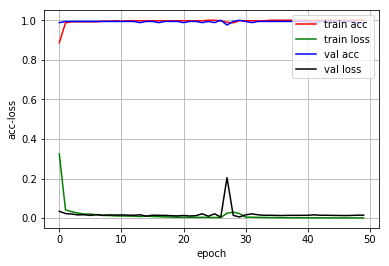

In [58]:
history.loss_plot('epoch')

### Random Forest

In [10]:
X = data
y = label

In [63]:
all_score = []
all_score1 = []
all_score2 = []
for i in range(50):
    skf = StratifiedKFold(n_splits=10,random_state=5,shuffle=True)
    clf = RandomForestClassifier(max_depth=1, n_estimators=i+1)
    score1 = []
    score2 = []
    Sensitivity = []
    Specificity = []
    auc = []
    A = []
    for train, test in skf.split(X,y):
        X_train,X_test=X.iloc[train],X.iloc[test]
        y_train,y_test=y.iloc[train],y.iloc[test]
        clf.fit(X_train, y_train)

        y_pred1 = clf.predict(X_train)
        accuracy1 = np.mean(y_train==y_pred1)
        score1.append(accuracy1)

        y_pred2 = clf.predict(X_test)
        accuracy2 = np.mean(y_test==y_pred2)
        score2.append(accuracy2)
        confusion = metrics.confusion_matrix(y_test, y_pred2)
        auc_ = metrics.roc_auc_score(y_test, y_pred2)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        TPR = TP/(TP+FN)
        TNR = TN/(TN+FP)
        Sensitivity.append(TPR)
        Specificity.append(TNR)
        auc.append(auc_)
    score1 = np.array(score1)
    score2 = np.array(score2)
    Sensitivity = np.array(Sensitivity)
    Specificity = np.array(Specificity)
    auc = np.mean(np.array(auc))
    score1 = np.mean(score1)
    score2 = np.mean(score2)
    all_score.append(auc)
    all_score1.append(score1)
    all_score2.append(score2)
print('The best auc on test set is ', np.max(all_score))

The best auc on test set is  0.9735196078431374


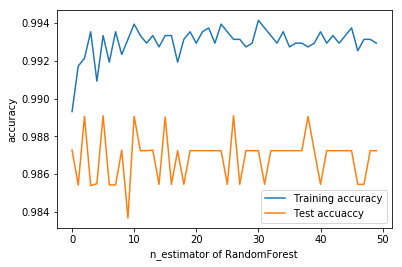

In [64]:
plt.figure()
plt.plot(all_score1, label='Training accuracy')
plt.plot(all_score2, label='Test accuaccy')
plt.xlabel("n_estimator of RandomForest")
plt.ylabel('accuracy')
plt.legend()
plt.show()

# SVM

In [65]:
skf = StratifiedKFold(n_splits=10,random_state=5,shuffle=True)
clf = SVC(gamma='auto')
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
A = []
for train, test in skf.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

The accuracy on trainging set is: 0.9951596594883736 The accuracy on test set is: 0.9944781144781146
The Sensitivity is: 0.9960000000000001 The Specificity is 0.975
auc is: 0.9855


## K  nearest neighbour classifiner

In [9]:
all_score1 = []
all_score2 = []
all_score = []
for i in range(2,30):
    skf = StratifiedKFold(n_splits=10,random_state=5,shuffle=True)
    clf = KNeighborsClassifier(n_neighbors=i)
    score1 = []
    score2 = []
    Sensitivity = []
    Specificity = []
    auc = []
    A = []
    for train, test in skf.split(X,y):
        X_train,X_test=X.iloc[train],X.iloc[test]
        y_train,y_test=y.iloc[train],y.iloc[test]
        clf.fit(X_train, y_train)

        y_pred1 = clf.predict(X_train)
        accuracy1 = np.mean(y_train==y_pred1)
        score1.append(accuracy1)

        y_pred2 = clf.predict(X_test)
        accuracy2 = np.mean(y_test==y_pred2)
        score2.append(accuracy2)
        confusion = metrics.confusion_matrix(y_test, y_pred2)
        auc_ = metrics.roc_auc_score(y_test, y_pred2)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        TPR = TP/(TP+FN)
        TNR = TN/(TN+FP)
        Sensitivity.append(TPR)
        Specificity.append(TNR)
        auc.append(auc_)
    score1 = np.array(score1)
    score2 = np.array(score2)
    Sensitivity = np.array(Sensitivity)
    Specificity = np.array(Specificity)
    auc = np.mean(np.array(auc))
    score1 = np.mean(score1)
    score2 = np.mean(score2)
    all_score.append(auc)
    all_score1.append(score1)
    all_score2.append(score2)
print('The best auc on test set is ', np.max(all_score))

The best auc on test set is  0.9845


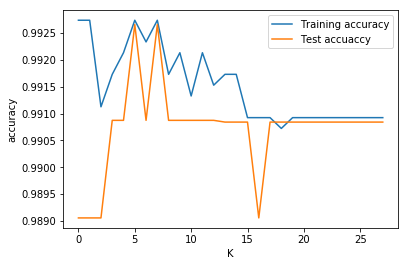

In [10]:
plt.figure()
plt.plot(all_score1, label='Training accuracy')
plt.plot(all_score2, label='Test accuaccy')
plt.xlabel("K")
plt.ylabel('accuracy')
plt.legend()
plt.show()